<a href="https://colab.research.google.com/github/kplam3003/Phuoc-Lam/blob/main/Statistical_Analysis_Perform_a_Kolmogorov_Smirnov_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import random
from itertools import combinations

Simulate a league with perfect competion

Perfect competition assumes a 50% chance of any team winning a game and no draws

In [2]:
def simulate_naive(n_teams):
  #Simulate a single season'
    scores = np.zeros(n_teams, dtype=int)
    for i, j in combinations(range(n_teams), 2):
      # each pair of teams play twice, each time with 50/50 chance of 
      # either team winning; the winning team gets three points
        scores[i if np.random.rand() < 0.5 else j] += 3
        scores[i if np.random.rand() < 0.5 else j] += 3
      
    return scores

# Simulate across multiple seasons
def perfect_competition(n_teams, n_seasons):
    df = pd.DataFrame({season: simulate_naive(n_teams) for season in range(n_seasons)})
    return df

In [3]:
perfect_league20 = perfect_competition(n_teams=20, n_seasons=11).T
perfect_league18 = perfect_competition(n_teams=18, n_seasons=11).T

In [4]:
# DEFINE FUNCTION TO READ FILES FROM GITHUB REPOS
def read_file(url):

    """
    Takes GitHub url as an argument,
    pulls CSV file located @ github URL.

    """

    url = url + "?raw=true"
    df = pd.read_csv(url)
    return df

# Read in data for leagues
premier_league = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/Premier_League.csv")
la_liga = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/LA_Liga.csv")
Bundesliga = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/Bundesliga.csv")
SerieA = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/SerieA.csv")
Ligue1 = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/Ligue1.csv")
Eredivisie = read_file("https://github.com/john-adeojo/FootballLeagues/blob/main/Eredivisie.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

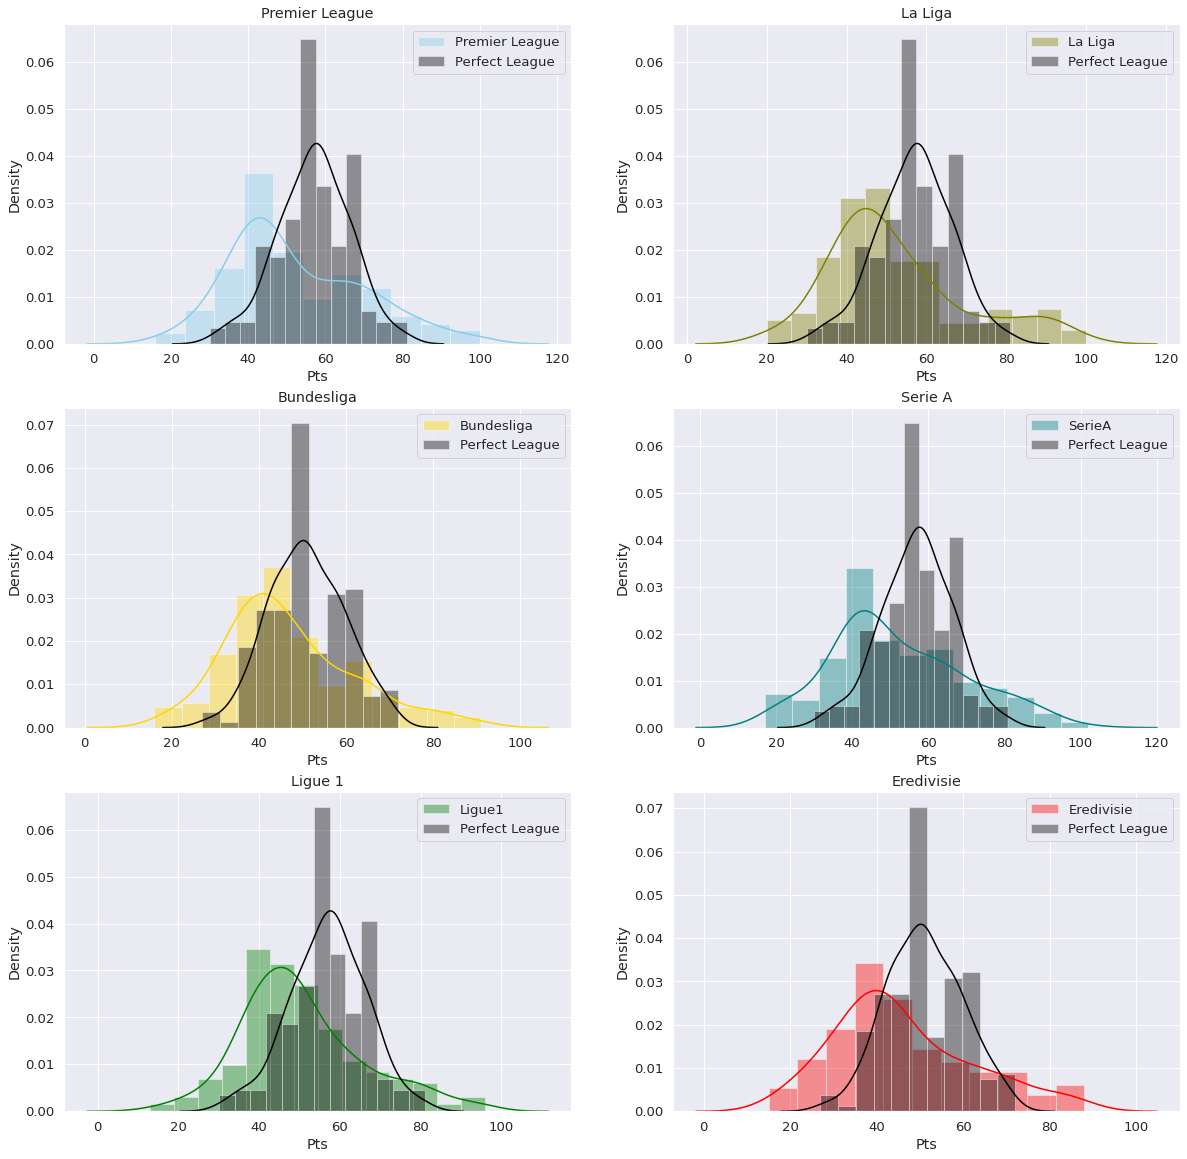

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.set(font_scale=1.2) 
df = sns.load_dataset("iris")

fig, axs = plt.subplots(3, 2, figsize=(20, 20))

ax = sns.distplot(premier_league.Pts, kde=True, color="skyblue", ax=axs[0, 0], label="Premier League")
ax.set_title('Premier League')
ax = sns.distplot(la_liga.Pts, kde=True, color="olive", ax=axs[0, 1], label="La Liga")
ax.set_title('La Liga')
ax = sns.distplot(Bundesliga.Pts, kde=True, color="gold", ax=axs[1, 0], label="Bundesliga")
ax.set_title('Bundesliga')
ax = sns.distplot(SerieA.Pts, kde=True, color="teal", ax=axs[1, 1], label="SerieA")
ax.set_title('Serie A')
ax = sns.distplot(Ligue1.Pts, kde=True, color="green", ax=axs[-1, 0], label="Ligue1")
ax.set_title('Ligue 1')
ax = sns.distplot(Eredivisie.Pts, kde=True, color="red", ax=axs[-1, 1], label="Eredivisie")
ax.set_title('Eredivisie')
ax = sns.distplot(perfect_league20, kde=True, color="black", ax=axs[0, 0], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league20, kde=True, color="black", ax=axs[0, 1], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league18, kde=True, color="black", ax=axs[1, 0], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league20, kde=True, color="black", ax=axs[1, 1], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league20, kde=True, color="black", ax=axs[-1, 0], label="Perfect League")
ax.legend()
ax = sns.distplot(perfect_league18, kde=True, color="black", ax=axs[-1, 1], label="Perfect League")
ax.legend()
plt.savefig('football_league_dists.png', dpi=200)
plt.show()


Statistical Analysis
Perform a Kolmogorov-Smirnov test

We will set up a hypothesis test h0 There is no difference between the perfect league and league x h1 There is a difference between the perfect league and


In [6]:
from scipy.stats import ks_2samp

# Flatten our perfect league 
flat20 = perfect_league20.to_numpy().flatten()
flat18 = perfect_league18.to_numpy().flatten()

print("Premier League", ks_2samp(premier_league.Pts, flat20))
print("la liga", ks_2samp(la_liga.Pts, flat20))
print("Bundesliga", ks_2samp(Bundesliga.Pts, flat18))
print("Serie A", ks_2samp(SerieA.Pts, flat20))
print("Ligue 1", ks_2samp(Ligue1.Pts, flat20))
print("Eredivisie", ks_2samp(Eredivisie.Pts, flat18))

Premier League Ks_2sampResult(statistic=0.38636363636363635, pvalue=4.960757016369679e-15)
la liga Ks_2sampResult(statistic=0.37727272727272726, pvalue=2.4686635388460533e-14)
Bundesliga Ks_2sampResult(statistic=0.32323232323232326, pvalue=1.50446998581523e-09)
Serie A Ks_2sampResult(statistic=0.35909090909090907, pvalue=5.387139100255126e-13)
Ligue 1 Ks_2sampResult(statistic=0.40454545454545454, pvalue=1.7621509017197994e-16)
Eredivisie Ks_2sampResult(statistic=0.37373737373737376, pvalue=1.0617567364880989e-12)


In [7]:


# Run a montecarlo simulation over 1,000 turns to get distribution of KS scores for each
def KS_MonteCarlo(euro_league, n_teams, n_seasons):
    simulation = np.arange(1,1001,1)
    ks_run =[]
    for run in simulation:
        flat20 = perfect_competition(n_teams, n_seasons).T.to_numpy().flatten()
        ks_run.append(ks_2samp(euro_league.Pts, flat20).statistic)
    
    return pd.DataFrame(ks_run)



In [8]:


# Simulate for each league
Prem_KS = KS_MonteCarlo(premier_league, n_teams=20, n_seasons=11)
LALiga_KS = KS_MonteCarlo(la_liga, n_teams=20, n_seasons=11)
Bundes_KS = KS_MonteCarlo(Bundesliga, n_teams=18, n_seasons=11)
SerieA_KS = KS_MonteCarlo(SerieA, n_teams=20, n_seasons=11)
Ligue1_KS = KS_MonteCarlo(Ligue1, n_teams=20, n_seasons=11)
Eredivisie_KS = KS_MonteCarlo(Eredivisie, n_teams=20, n_seasons=11)



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

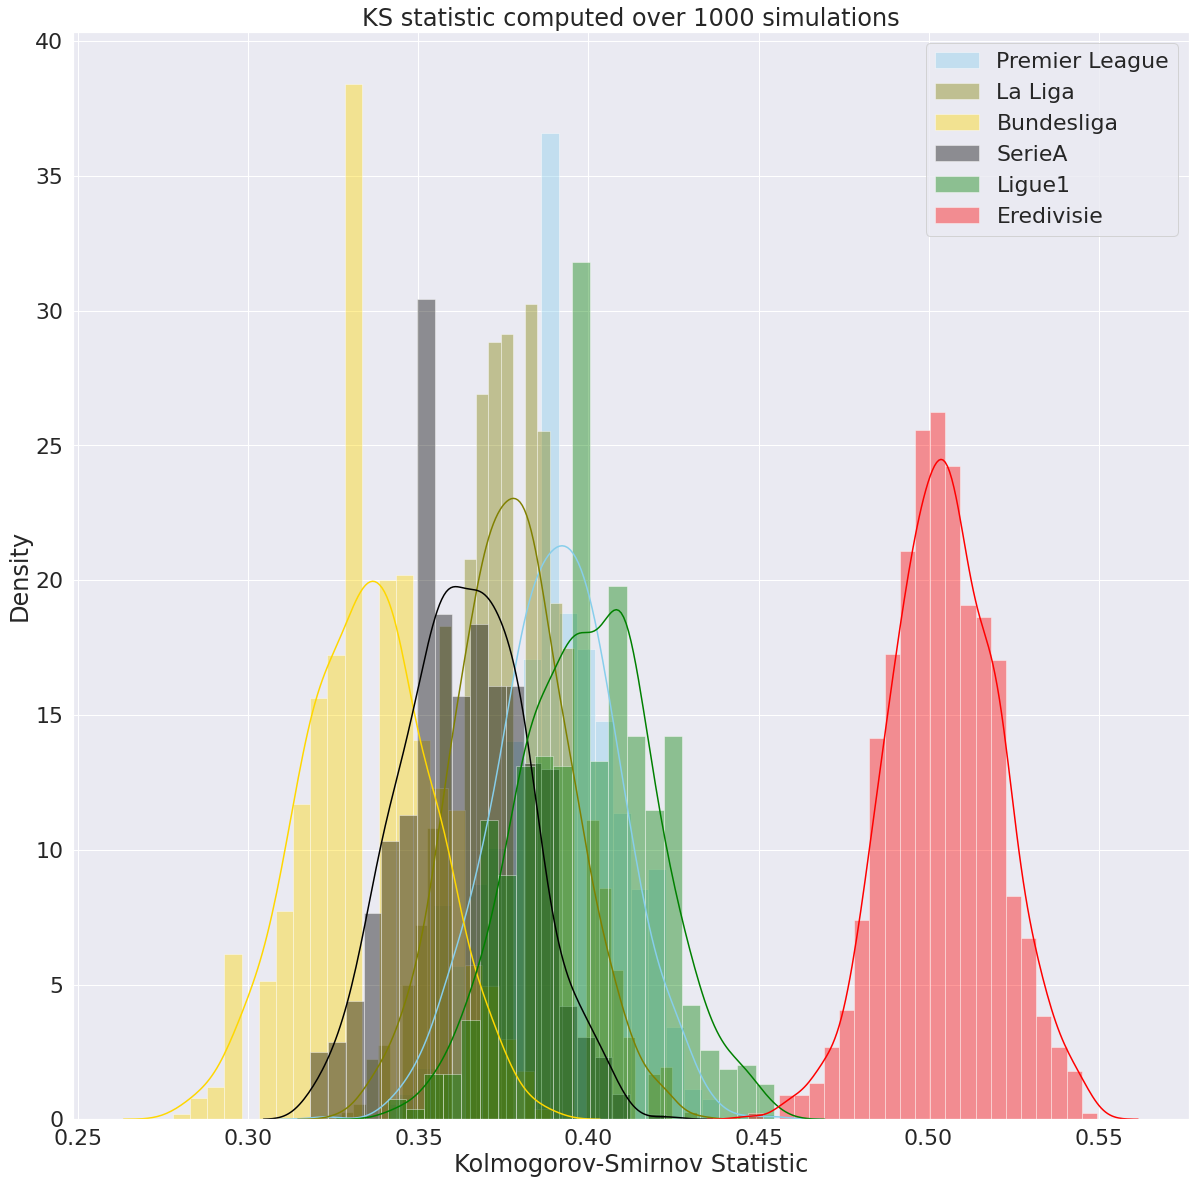

In [9]:
sns.set(style="darkgrid")
sns.set(font_scale=2) 
df = sns.load_dataset("iris")

fig, axs = plt.subplots(figsize=(20, 20))

ax = sns.distplot(Prem_KS, kde=True, color="skyblue", label="Premier League")
ax = sns.distplot(LALiga_KS, kde=True, color="olive", label="La Liga")
ax = sns.distplot(Bundes_KS, kde=True, color="gold", label="Bundesliga")
ax = sns.distplot(SerieA_KS, kde=True, color="black", label="SerieA")
ax = sns.distplot(Ligue1_KS, kde=True, color="green", label="Ligue1")
ax = sns.distplot(Eredivisie_KS, kde=True, color="red", label="Eredivisie")
ax.set_title('KS statistic computed over 1000 simulations')
ax.legend()
ax.set_xlabel("Kolmogorov-Smirnov Statistic")
plt.savefig('football_league_KS_Plot.png', dpi=200)
plt.show()